In [1]:
from keras.datasets import imdb

#Cargamos los datos de imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [38]:
#Así se podría decodificar una reseña de imdb de vuelta a texto

word_index = imdb.get_word_index() #Obtiene un diccionario para mapear cada palabra a un índice numérico único
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i- 3, '?') for i in train_data[2]])

print(decoded_review)

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [2]:
import numpy as np

#Codificación one-hot: vector de tamaño 10.000 donde los indices de las palabras de la reseña se establecen en 1 y el resto en 0

def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
     results[i, sequence] = 1.
 return results
 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
from keras import models
from keras import layers

#Input: texto vectorizado -> Capa de 16 unidades (relu) -> Capa de 16 unidades (relu) -> Capa de 1 unidad (sigmoide) -> Output: provabilidad [0-1]

model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [56]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [57]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
 )

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.5111 - loss: 0.6931 - val_acc: 0.7069 - val_loss: 0.6894
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6779 - loss: 0.6761 - val_acc: 0.7773 - val_loss: 0.5559
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8357 - loss: 0.5254 - val_acc: 0.8330 - val_loss: 0.5109
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9067 - loss: 0.4321 - val_acc: 0.8791 - val_loss: 0.4481
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9247 - loss: 0.3794 - val_acc: 0.8614 - val_loss: 0.4400
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9313 - loss: 0.3396 - val_acc: 0.8671 - val_loss: 0.4161
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9470 - loss: 0.2560 - val_acc: 0.8655 - val_loss: 0.3750
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9522 - loss: 0.1652 - val_acc: 0.8757 - val_loss: 0.3922
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9669 - loss:

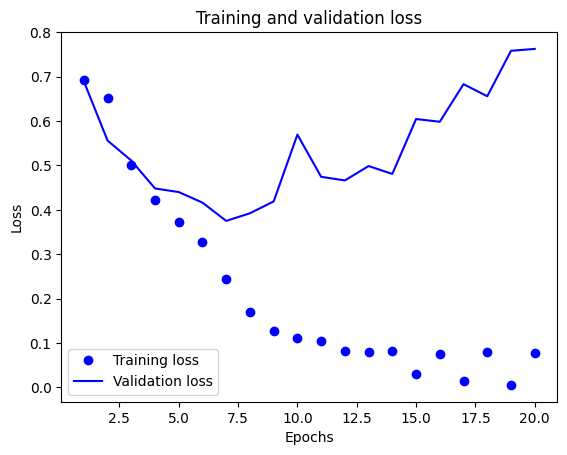

In [58]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

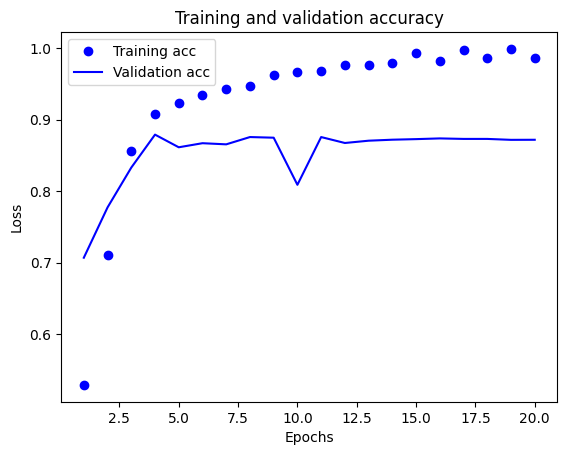

In [59]:
 plt.clf()
 acc_values = history_dict['acc']
 val_acc_values = history_dict['val_acc']

 plt.plot(epochs, acc_values, 'bo', label='Training acc')
 plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
 plt.title('Training and validation accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Loss')
 plt.legend()
 plt.show()

In [60]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step


array([[0.00318333],
       [0.99999994],
       [0.99999684],
       ...,
       [0.00158574],
       [0.00189602],
       [0.99561656]], dtype=float32)

In [61]:
def text_to_sequence(text):
    word_index = imdb.get_word_index() #Obtiene un diccionario para mapear cada palabra a un índice numérico único
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    words = text.lower().split()

    #Creamos un vector de tamaño 10,000 y asignamos 1s en las posiciones de los índices de las palabras
    vector = np.zeros(10000)
    for word in words:
        index = word_index.get(word, None)
        if index is not None and index < 10000:  # Asegurarse de que el índice esté dentro del rango permitido
            vector[index] = 1.0
        
    return vector


text_review = input("Escribe una reseña: ")
input_vector = text_to_sequence(text_review)

print(input_vector)

prediction = model.predict(np.array([input_vector]))
print(f"Reseña {"positiva" if prediction[0] < 0.5 else "negativa"}: {prediction[0]}")


Escribe una reseña:  This movie is undoubtedly one of the worst I've seen in a long time. The plot is predictable, with no interesting twists and a completely disorganized storyline. The characters are flat, with no development, and the performances are just bad. The special effects look cheap and fail to do justice to what could have been an interesting story. The direction also leaves much to be desired; it seems like no one really knew what they were trying to convey. In short, a huge waste of time and money. I wouldn't recommend it to anyone, not even my worst enemy.


[0. 1. 1. ... 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Reseña positiva: [0.01530122]
